In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, RocCurveDisplay

import matplotlib.pyplot as plt

In [2]:
# Load the data
gymEnrollAgeIncomeHoursDf = pd.read_excel("gym.xlsx")
gymEnrollAgeIncomeHoursDf.head()

Enroll  Age  Income  Hours
0       1   26   18000     14
1       0   43   13000      9
2       1   55   42000     16
3       1   55  100000     13
4       0   55   13000     12

In [3]:
gymEnrollAgeIncomeHoursDf.describe()

Enroll          Age         Income        Hours
count  1000.000000  1000.000000    1000.000000  1000.000000
mean      0.403000    44.582000   68340.000000    10.182000
std       0.490746    13.876737   44466.928247     4.671263
min       0.000000    21.000000    1000.000000     2.000000
25%       0.000000    32.000000   31000.000000     6.000000
50%       0.000000    45.000000   64000.000000    10.000000
75%       1.000000    57.000000   97000.000000    14.000000
max       1.000000    68.000000  198000.000000    18.000000

In [4]:
# Scale the features
scalerAge = StandardScaler()
gymEnrollAgeIncomeHoursDf['scalerAge'] = scalerAge.fit_transform(gymEnrollAgeIncomeHoursDf[["Age"]])
scalerIncome = StandardScaler()
gymEnrollAgeIncomeHoursDf['scalerIncome'] = scalerAge.fit_transform(gymEnrollAgeIncomeHoursDf[["Income"]])
scalerHours = StandardScaler()
gymEnrollAgeIncomeHoursDf['scalerHours'] = scalerAge.fit_transform(gymEnrollAgeIncomeHoursDf[["Hours"]])
gymEnrollAgeIncomeHoursDf['EnrollCategories'] = gymEnrollAgeIncomeHoursDf['Enroll'].astype('category')
gymEnrollAgeIncomeHoursDf

Enroll  Age  Income  Hours  scalerAge  scalerIncome  scalerHours  \
0         1   26   18000     14  -1.339746     -1.132644     0.817747   
1         0   43   13000      9  -0.114061     -1.245143    -0.253163   
2         1   55   42000     16   0.751128     -0.592647     1.246111   
3         1   55  100000     13   0.751128      0.712346     0.603565   
4         0   55   13000     12   0.751128     -1.245143     0.389383   
..      ...  ...     ...    ...        ...           ...          ...   
995       0   39    5000     13  -0.402457     -1.425142     0.603565   
996       0   38    5000      3  -0.474556     -1.425142    -1.538255   
997       1   55   70000     17   0.751128      0.037350     1.460293   
998       1   68   64000     15   1.688417     -0.097649     1.031929   
999       0   48   67000     18   0.246435     -0.030150     1.674475   

    EnrollCategories  
0                  1  
1                  0  
2                  1  
3                  1  
4                  0  
..               ...  
995                0  
996                0  
997                1  
998                1  
999                0  

[1000 rows x 8 columns]

In [5]:
# testTransformer = pd.DataFrame([[26], [43], [55]], columns=['Age'])
# scalerAge.transform(tt)

In [6]:
indAtts = ["scalerAge", "scalerIncome", "scalerHours"]
depAtt = "EnrollCategories"

In [7]:
# Split the data into training and testing sets
(gymEnrollAgeIncomeHoursDfX_train,
gymEnrollAgeIncomeHoursDfX_test,
gymEnrollAgeIncomeHoursDfy_train,
gymEnrollAgeIncomeHoursDfy_test) = train_test_split(
    gymEnrollAgeIncomeHoursDf[indAtts],
    gymEnrollAgeIncomeHoursDf[depAtt],
    test_size=0.4,
    random_state=1,
    stratify=gymEnrollAgeIncomeHoursDf[depAtt]
)


In [8]:
gymEnrollAgeIncomeHoursDfX_train.head()

scalerAge  scalerIncome  scalerHours
808   0.030137      0.824845     1.674475
393  -0.618755     -0.975145     0.175201
416  -0.979250     -1.425142     0.817747
486   0.679029     -1.065144     0.817747
422  -0.114061     -1.267643    -1.324073

In [9]:
# Perform k-NN classification with cross-validation to find the best k
class CustomKNNClassifier(KNeighborsClassifier):
    def prob(self, X):
        return self.predict_proba(X)[:, 1]
# gymEnrollAgeIncomeHoursDfKnn = KNeighborsClassifier()
gymEnrollAgeIncomeHoursDfKnn = CustomKNNClassifier()
param_grid = {'n_neighbors': list(range(1, 11))}
grid_search = GridSearchCV(gymEnrollAgeIncomeHoursDfKnn, param_grid, cv=5)
grid_search.fit(gymEnrollAgeIncomeHoursDfX_train, gymEnrollAgeIncomeHoursDfy_train)

GridSearchCV(cv=5, estimator=CustomKNNClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [10]:
bestParameters = grid_search.best_params_
bestCrossValidationScore = grid_search.best_score_
print("bestParameters:", bestParameters)
print("bestCrossValidationScore:", bestCrossValidationScore)

bestParameters: {'n_neighbors': 5}
bestCrossValidationScore: 0.915


In [11]:
# Display detailed results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.001510      0.000931         0.004020        0.000658   
1       0.000738      0.000121         0.002698        0.000260   
2       0.000706      0.000082         0.002601        0.000106   
3       0.000620      0.000074         0.002359        0.000102   
4       0.000538      0.000012         0.002157        0.000035   
5       0.000511      0.000016         0.002073        0.000035   
6       0.000478      0.000006         0.002026        0.000036   
7       0.000476      0.000017         0.001979        0.000015   
8       0.000472      0.000011         0.001990        0.000017   
9       0.000469      0.000008         0.002008        0.000031   

   param_n_neighbors               params  split0_test_score  \
0                  1   {'n_neighbors': 1}           0.866667   
1                  2   {'n_neighbors': 2}           0.833333   
2                  3   {'n_neighbors': 3}           0.908333   
3                  4   {'n_neighbors': 4}           0.850000   
4                  5   {'n_neighbors': 5}           0.875000   
5                  6   {'n_neighbors': 6}           0.866667   
6                  7   {'n_neighbors': 7}           0.875000   
7                  8   {'n_neighbors': 8}           0.866667   
8                  9   {'n_neighbors': 9}           0.866667   
9                 10  {'n_neighbors': 10}           0.841667   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.908333           0.866667           0.900000           0.916667   
1           0.858333           0.883333           0.866667           0.866667   
2           0.916667           0.883333           0.933333           0.900000   
3           0.925000           0.858333           0.933333           0.900000   
4           0.941667           0.883333           0.950000           0.925000   
5           0.941667           0.858333           0.933333           0.916667   
6           0.933333           0.858333           0.941667           0.916667   
7           0.933333           0.858333           0.933333           0.908333   
8           0.925000           0.883333           0.941667           0.916667   
9           0.941667           0.866667           0.941667           0.916667   

   mean_test_score  std_test_score  rank_test_score  
0         0.891667        0.021082                9  
1         0.861667        0.016330               10  
2         0.908333        0.016667                2  
3         0.893333        0.033912                8  
4         0.915000        0.030459                1  
5         0.903333        0.034400                5  
6         0.905000        0.032745                4  
7         0.900000        0.032059                7  
8         0.906667        0.027588                3  
9         0.901667        0.040620                6

In [12]:
gymEnrollAgeIncomeHoursDfKnnFit = grid_search.best_estimator_

In [13]:
# from copy import deepcopy

In [14]:
# gymEnrollAgeIncomeHoursDfKnnFit.predictHalfCutOff = deepcopy( gymEnrollAgeIncomeHoursDfKnnFit.predict)
gymEnrollAgeIncomeHoursDfKnnFit.predictHalfCutOff = gymEnrollAgeIncomeHoursDfKnnFit.predict

In [15]:
 gymEnrollAgeIncomeHoursDfKnnFit.predict =  gymEnrollAgeIncomeHoursDfKnnFit.prob

In [16]:
gymEnrollAgeIncomeHoursDfX_test

scalerAge  scalerIncome  scalerHours
489   1.111624      1.049844     0.389383
241  -0.041962     -0.705146     0.175201
119  -0.186160     -0.705146    -0.681527
577  -1.267647     -0.052650    -1.109891
287   0.246435     -0.885145     1.674475
..         ...           ...          ...
804   0.174336      1.387342    -0.895709
974   1.400020      1.139844    -1.752437
810   0.895327      0.577347     1.246111
395   0.174336      0.172349     1.246111
861   0.246435     -0.075150     0.603565

[400 rows x 3 columns]

In [17]:
predictionProb = gymEnrollAgeIncomeHoursDfKnnFit.predict(gymEnrollAgeIncomeHoursDfX_test)
predictHalfCutOff = gymEnrollAgeIncomeHoursDfKnnFit.predictHalfCutOff(gymEnrollAgeIncomeHoursDfX_test)
gymEnrollAgeIncomeHoursDfX_test['predictionProb'] = predictionProb
gymEnrollAgeIncomeHoursDfX_test['predictHalfCutOff'] = predictHalfCutOff

In [22]:
gymEnrollAgeIncomeHoursDfX_test

scalerAge  scalerIncome  scalerHours  predictionProb  predictHalfCutOff
489   1.111624      1.049844     0.389383             1.0                  1
241  -0.041962     -0.705146     0.175201             0.0                  0
119  -0.186160     -0.705146    -0.681527             0.2                  0
577  -1.267647     -0.052650    -1.109891             0.4                  0
287   0.246435     -0.885145     1.674475             0.2                  0
..         ...           ...          ...             ...                ...
804   0.174336      1.387342    -0.895709             0.6                  1
974   1.400020      1.139844    -1.752437             1.0                  1
810   0.895327      0.577347     1.246111             0.8                  1
395   0.174336      0.172349     1.246111             0.2                  0
861   0.246435     -0.075150     0.603565             0.2                  0

[400 rows x 5 columns]

In [26]:
# Confusion matrix
conf_matrix = confusion_matrix(gymEnrollAgeIncomeHoursDfy_test, gymEnrollAgeIncomeHoursDfX_test['predictHalfCutOff'])

# Convert confusion matrix to DataFrame with predicted as rows and actual as columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Predicted_0', 'Predicted_1'], columns=['Actual_0', 'Actual_1'])
print("Confusion Matrix as DataFrame:")
print(conf_matrix_df)


Confusion Matrix as DataFrame:
             Actual_0  Actual_1
Predicted_0       217        22
Predicted_1        17       144


In [31]:
# Calculate metrics
precision = precision_score(gymEnrollAgeIncomeHoursDfy_test, gymEnrollAgeIncomeHoursDfX_test['predictHalfCutOff'])
recall = recall_score(gymEnrollAgeIncomeHoursDfy_test, gymEnrollAgeIncomeHoursDfX_test['predictHalfCutOff'])
accuracy = accuracy_score(gymEnrollAgeIncomeHoursDfy_test, gymEnrollAgeIncomeHoursDfX_test['predictHalfCutOff'])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
f1Score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 f1Score: {f1Score}")

Accuracy: 0.9025
Precision: 0.8674698795180723
Recall (Sensitivity): 0.8944099378881988
Specificity: 0.9079497907949791
F1 f1Score: 0.8807339449541285


In [28]:
roc_auc = roc_auc_score(gymEnrollAgeIncomeHoursDfy_test, gymEnrollAgeIncomeHoursDfX_test['predictionProb'])
print("ROC AUC:", roc_auc)

ROC AUC: 0.9423191870890616


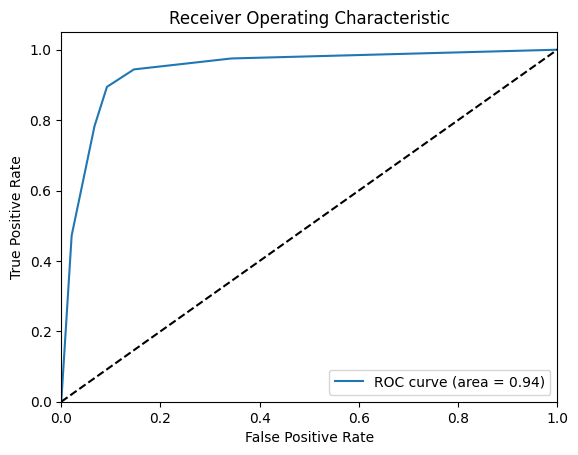

In [30]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(gymEnrollAgeIncomeHoursDfy_test, gymEnrollAgeIncomeHoursDfX_test['predictionProb'] )
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics = {}
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['accuracy'] = accuracy
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['recall'] = recall
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['precision'] = precision
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['sensitivity'] = recall
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['specificity'] = specificity
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['f1Score'] = f1Score
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['roc_auc'] = roc_auc
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['cvK'] = 5
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['bestParameters'] = bestParameters
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics['bestCrossValidationScore'] = bestCrossValidationScore
gymEnrollAgeIncomeHoursDfKnnFit.customMetrics

{'accuracy': 0.9025,
 'recall': 0.8944099378881988,
 'precision': 0.8674698795180723,
 'sensitivity': 0.8944099378881988,
 'specificity': 0.9079497907949791,
 'f1Score': 0.8807339449541285,
 'roc_auc': 0.9423191870890616,
 'cvK': 5,
 'bestParameters': {'n_neighbors': 5},
 'bestCrossValidationScore': 0.915}

In [33]:
gymEnrollAgeIncomeHoursDfKnnFit.internaltransformers = [
    {
        "origin": "Age",
        "to": "scalerAge",
        "transformerModel": scalerAge,
        "methodToCall": "fit_transform"
    },
    {
        "origin": "Income",
        "to": "scalerIncome",
        "transformerModel": scalerIncome,
        "methodToCall": "fit_transform"
    },
    {
        "origin": "Hours",
        "to": "scalerHours",
        "transformerModel": scalerHours,
        "methodToCall": "fit_transform"
    },
]

In [34]:
from functions.exportModel import exportModel
exportModel({
    "modelName": "gymEnrollAgeIncomeHoursDfKnnFit",
    "model": gymEnrollAgeIncomeHoursDfKnnFit,
    "description": "gymEnrollAgeIncomeHoursDf",
    "modelType": "knn",
    "baseRelativePath": "..",
    "inputs": [
        {
            "name": "Age",
            "type": "int"
        },
        {
            "name": "Income",
            "type": "int"
        },
        {
            "name": "Hours",
            "type": "int"
        }
    ],
    "output": {
        "name": "Enroll_probibility",
        "type": "float"
    }
})

CustomKNNClassifier()